<a href="https://colab.research.google.com/github/mesbasajib/Data2/blob/main/Week_3_Day_2_group_ML_Logistic_Regression_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing our pandas library
import pandas as pd

In [ ]:
# loading our data into the train variable
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/titanic_train.csv')

In [ ]:
# looking at the first five rows
train.head()

'''
Titanic dataset
passenger if they survived the accident
# we know, the name, sex, age, sibiling and spouses, parch is number of parents and child board, ticket, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [ ]:
# import seaborn for EDA
import seaborn as sns

In [ ]:
# import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

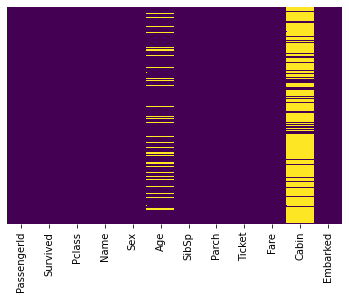

In [ ]:
# created heatmap

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# we are showing a heatmap of NA, and there seems to be a lot of cabin informtation missing
# along with age

In [ ]:
# Heatmap is defined as a graphical representation of data using colors
# to visualize the value of the matrix. In this, to represent more common
# values or higher activities brighter colors basically reddish colors 
# are used and to represent less common or activity values,
# darker colors are preferred.

## Class


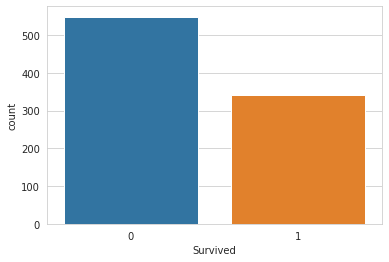

In [ ]:
# setting a style just because
sns.set_style('whitegrid')

# counted if you survived or not
sns.countplot(x='Survived', data=train)

# 0 is off, 1 is on 
# 500+ did not survive, and around 320~ did survive based
# on the count of this plot

## Survived

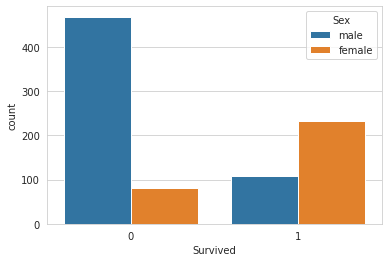

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

# so now we split the chart by sex
# so, we have a lot more males dying than females on this ship
# females made the majority of survivors
# maybe the male in the survived column, are little boys

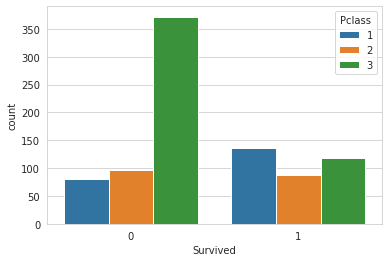

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

# so the passenger class is the hue
# and all the low fare  passengers died in a larger
# amount than the class 1 and class 2 passenger
# so, lower fare passenger class survived in a higher amount
# than class 2 passenger

## Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


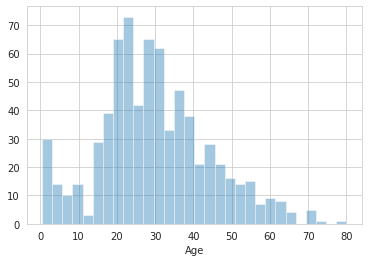

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

# the age distribution on the ship
# a good chunk of passengers were of the age 20-35


## Siblings

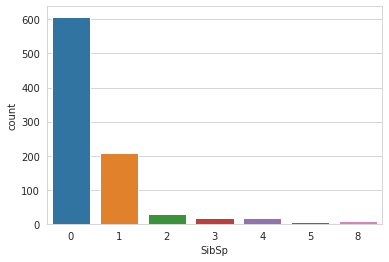

In [ ]:
sns.countplot(x='SibSp',data=train)

# most people did not come with siblings or spouses
# they may have been girlfriend and boyfriend, or single people or friends
# we have fewer people with 1 or more sibling or spouse

# Data Cleaning and Data Pre - Processing

In [ ]:
# so cabin is our outcome, so we drop it from the set
train.drop('Cabin', axis=1, inplace= True)

In [ ]:
# we drop NA values
train.dropna(inplace=True)

In [ ]:
# we are creating dummy variables
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

When using categorical variables, it doesn’t make sense to just assign values like 1, 2, 3, to values like “blue”, “green”, and “brown” because it doesn’t make sense to say that green is twice as colorful as blue or that brown is three times as colorful as blue.

Instead, the solution is to use dummy variables. These are variables that we create specifically for regression analysis that take on one of two values: zero or one.

Dummy Variables: Numeric variables used in regression analysis to represent categorical data that can only take on one of two values: zero or one.
https://www.statology.org/dummy-variables-regression/

In [ ]:
# drop sex, embarked, name, ticket
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predict = logmodel.predict(X_test)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.72      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[105  23]
 [ 26  60]]


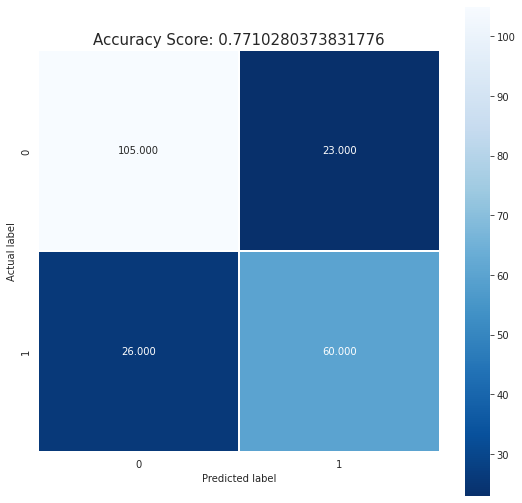

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn import  metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


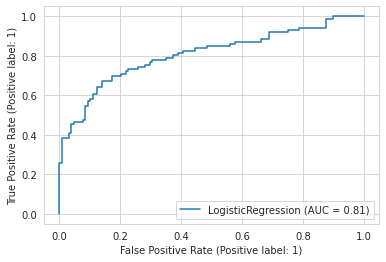

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

Observation..

# Conclusion...